In [371]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy.random as random

In [372]:
color_map = {"s": "blue", "i": "red", "r": "gray"}
options = {
    "node_size": 100,
    "arrowstyle": "-|>",
    "arrowsize": 12
}

In [373]:
beta = 0.05
gamma = 0.50
N = 20

In [374]:
G = nx.DiGraph()
G.add_nodes_from(range(N))
for i in range(len(G.nodes)):
    G.nodes[i]["group"] = "s"
G.nodes[0]["group"] = "i"
G.nodes[0]["recovery_time_left"] = 1
G.nodes.data()

NodeDataView({0: {'group': 'i', 'recovery_time_left': 1}, 1: {'group': 's'}, 2: {'group': 's'}, 3: {'group': 's'}, 4: {'group': 's'}, 5: {'group': 's'}, 6: {'group': 's'}, 7: {'group': 's'}, 8: {'group': 's'}, 9: {'group': 's'}, 10: {'group': 's'}, 11: {'group': 's'}, 12: {'group': 's'}, 13: {'group': 's'}, 14: {'group': 's'}, 15: {'group': 's'}, 16: {'group': 's'}, 17: {'group': 's'}, 18: {'group': 's'}, 19: {'group': 's'}})

In [375]:
for node in G.nodes.data():
    if node[1]["group"] == "i":
        # All other nodes are suspected to be infected!
        for other_node in G.nodes:
            if other_node != node[0]:
                G.add_weighted_edges_from([(node[0], other_node, beta)])
G.edges.data()

OutEdgeDataView([(0, 1, {'weight': 0.05}), (0, 2, {'weight': 0.05}), (0, 3, {'weight': 0.05}), (0, 4, {'weight': 0.05}), (0, 5, {'weight': 0.05}), (0, 6, {'weight': 0.05}), (0, 7, {'weight': 0.05}), (0, 8, {'weight': 0.05}), (0, 9, {'weight': 0.05}), (0, 10, {'weight': 0.05}), (0, 11, {'weight': 0.05}), (0, 12, {'weight': 0.05}), (0, 13, {'weight': 0.05}), (0, 14, {'weight': 0.05}), (0, 15, {'weight': 0.05}), (0, 16, {'weight': 0.05}), (0, 17, {'weight': 0.05}), (0, 18, {'weight': 0.05}), (0, 19, {'weight': 0.05})])

In [376]:
G_over_time = [G.copy()]

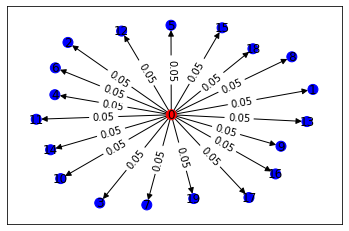

In [377]:
def plot_G(G):
    pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G, pos, node_color = [color_map[G.nodes[i]["group"]] for i in G], **options)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plot_G(G)

In [378]:
def infect_neighbors(G):
    for node in G.nodes.data():
        if node[1]["group"] == "i":
            
            # Gives a chance to be infected with all neighbors
            for neighbor in G.neighbors(node[0]):
                if random.rand() < beta:
                    # neighbor got infected :(
                    G.nodes[neighbor]["group"] = "i"
                    G.nodes[neighbor]["recovery_time_left"] = 1

def recover_infected(G):
    for node in G.nodes.data():
        if node[1]["group"] == "i":
            # Add to the recovery rate
            node[1]["recovery_time_left"] -= gamma
            
            # Checks if they have recovered
            if node[1]["recovery_time_left"] < 0:
                # They are recovered
                node[1]["group"] = "r"

def add_new_edges(G):
    G.remove_edges_from(list(G.edges))
    for node in G.nodes.data():
        if node[1]["group"] == "i":
            # All other nodes are suspected to be infected!
            for other_node in G.nodes.data():
                if other_node[0] != node[0] and other_node[1]["group"] == "s":
                    G.add_weighted_edges_from([(node[0], other_node[0], beta)])

for i in range(10): 

    # Infect new individuals
    infect_neighbors(G)

    # See which infected get recovered
    recover_infected(G)

    # Makes new edges
    add_new_edges(G)

    G_over_time.append(G.copy())

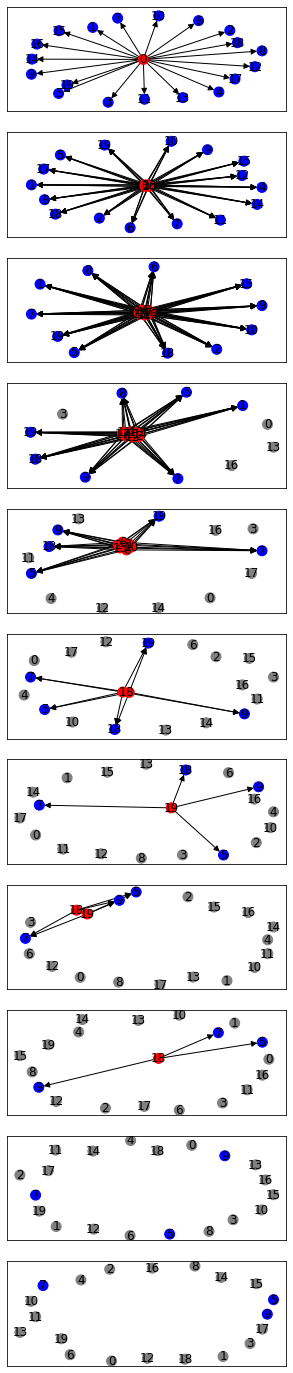

In [379]:
fig, axs = plt.subplots(len(G_over_time), figsize = (5, 25))
for i in range(len(G_over_time)):
    curr_G = G_over_time[i]
    pos=nx.spring_layout(curr_G)
    labels = nx.get_edge_attributes(curr_G,'weight')
    nx.draw_networkx(curr_G, pos, node_color = [color_map[curr_G.nodes[i]["group"]] for i in curr_G], **options, ax = axs[i])